# Excercise 1

In [27]:
#Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
#loading the red wine dataset first
df_wine_red = pd.read_csv('./Wine Data/winequality-red.csv', sep=';')
df_wine_red['type'] = 'red' #adding a new column to the red wine dataset to indicate the type of wine
df_wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [29]:
#loading the white wine dataset second
df_wine_white = pd.read_csv('./Wine Data/winequality-white.csv', sep=';')
df_wine_white['type'] = 'white' #adding a new column to the white wine dataset to indicate the type of wine
df_wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [30]:
df_wine = pd.concat([df_wine_red, df_wine_white], axis=0) #combining the two wine datasets into one
df_wine.shape

(6497, 13)

**Pie Chart to visualize the propotion of red wine vs white wine**

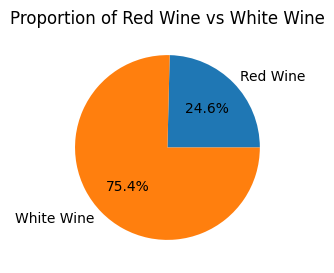

In [31]:
red_count = df_wine[df_wine['type'] == 'red'].shape[0] #counting the number of red wines in the dataset
white_count = df_wine[df_wine['type'] == 'white'].shape[0] #counting the number of white wines in the dataset   

#plotting the pie chart
wine_counts = np.array([red_count, white_count]) #creating a numpy array of the two sets of wine counts
wine_labels = ['Red Wine', 'White Wine'] #creating labels for the two sets of wine counts

plt.figure(figsize=(5,3)) #setting the figure size

plt.pie(wine_counts, labels=wine_labels, autopct='%1.1f%%') #plotting the pie chart with percentages
plt.title('Proportion of Red Wine vs White Wine')

plt.show()

**Histogram to understand the distribution of wine quality**

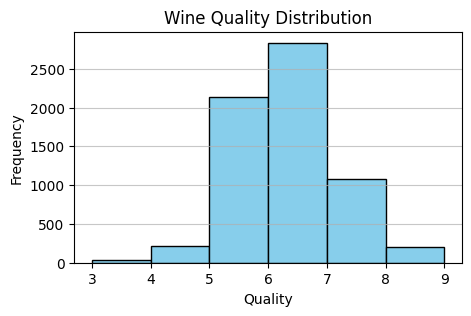

In [32]:
plt.figure(figsize=(5, 3)) #Size of the figure

#calculating the min and max quality values to set the range of the histogram bins
quality_min = int(df_wine['quality'].min())
quality_max = int(df_wine['quality'].max()) + 1 # Adding 1 to include the max value in the bins

#plotting the histogram
plt.hist(df_wine['quality'], bins=range(quality_min, quality_max), color='skyblue', edgecolor='black')

#setting titles, labels and gridlines for better readability
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

plt.show()



**Scatter plots to visualize the relationships between certain attributes of white wine as well as certain attributes of red wine**

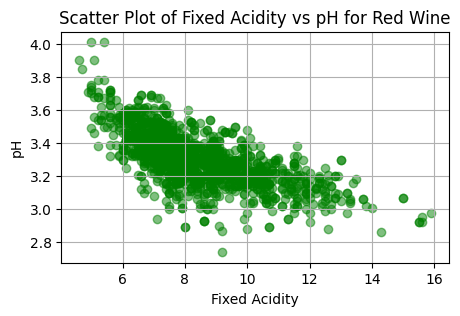

In [33]:
plt.figure(figsize=(5, 3)) #Size of the figure

#scatter plot for the relationship between fixed acidity and pH for red wine
plt.scatter(df_wine_red['fixed acidity'], df_wine_red['pH'],alpha=0.5, color='green')

plt.title('Scatter Plot of Fixed Acidity vs pH for Red Wine')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.grid(True)

plt.show()

**The above scatter plot is very crowded, hence data reduction will be done to reduce the number of data points**

C:\Users\mitch\AppData\Local\Temp\ipykernel_34188\3614234238.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df_wine_red.groupby('fixed_acidity_binned')['pH'].mean().reset_index()


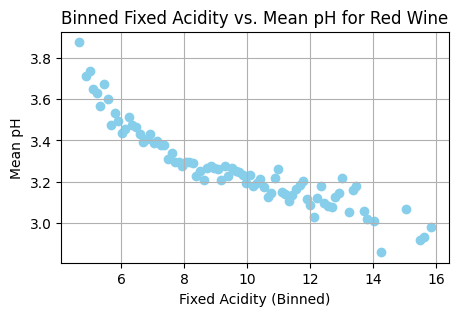

In [34]:
df_wine_red['fixed_acidity_binned'] = pd.cut(df_wine_red['fixed acidity'], bins=100)

# Calculate the mean pH for each fixed acidity bin
binned_data = df_wine_red.groupby('fixed_acidity_binned')['pH'].mean().reset_index()

# Convert the bins to a numerical representation for plotting
binned_data['fixed_acidity_binned'] = binned_data['fixed_acidity_binned'].apply(lambda x: x.mid)

# Create the scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(binned_data['fixed_acidity_binned'], binned_data['pH'], color='skyblue')
plt.title('Binned Fixed Acidity vs. Mean pH for Red Wine')
plt.xlabel('Fixed Acidity (Binned)')
plt.ylabel('Mean pH')
plt.grid(True)
plt.show()

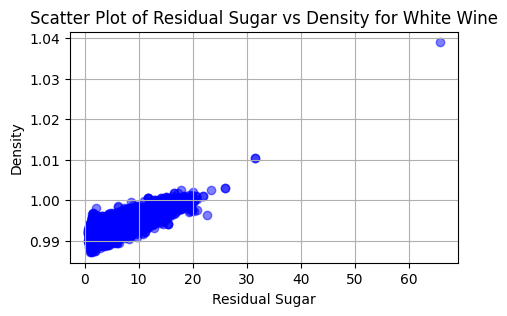

In [35]:
plt.figure(figsize=(5, 3)) #Size of the figure

#scatter plot for the relationship between residual sugar and density for white wine
plt.scatter(df_wine_white['residual sugar'], df_wine_white['density'],alpha=0.5, color='blue')
plt.title('Scatter Plot of Residual Sugar vs Density for White Wine')
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.grid(True)

plt.show()

**The above scatter plot is very crowded, hence data reduction will be done to reduce the number of data points**


C:\Users\mitch\AppData\Local\Temp\ipykernel_34188\291116634.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df_wine_white.groupby('residual_sugar_binned')['density'].mean().reset_index()


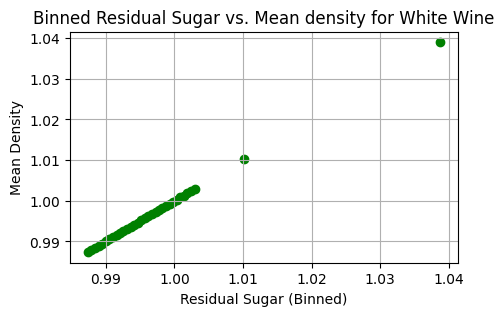

In [36]:
df_wine_white['residual_sugar_binned'] = pd.cut(df_wine_white['density'], bins=100)

# Calculate the mean pH for each fixed acidity bin
binned_data = df_wine_white.groupby('residual_sugar_binned')['density'].mean().reset_index()

# Convert the bins to a numerical representation for plotting
binned_data['residual_sugar_binned'] = binned_data['residual_sugar_binned'].apply(lambda x: x.mid)

# Create the scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(binned_data['residual_sugar_binned'], binned_data['density'], color='green')
plt.title('Binned Residual Sugar vs. Mean density for White Wine')
plt.xlabel('Residual Sugar (Binned)')
plt.ylabel('Mean Density')
plt.grid(True)
plt.show()